<a href="https://colab.research.google.com/github/rlcirino/PUC_Ci-nciaDados/blob/main/PUCRIO_MVP1_RubensLCirino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) DEFINIÇÃO DO PROBLEMA

O dataset usado neste projeto será o Wholesale customers, proveniente do UCI Machine Learning Repository. O presente dataset é um subset de uma base de dados maior referida  em  Abreu, N. (2011). “Analise do perfil do cliente Recheio e desenvolvimento de um sistema  promocional” – Mestrado em Marketing , ISCTE-IUL, Lisboa. Seu objetivo é mostrar o volume anual de vendas de um comércio atacadista, expresso em unidades monetárias, de diversas categorias de produtos. Para mais detalhes sobre o dataset, consulte: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#
Informações sobre os atributos:
1.	Canal de Venda – qual o tipo de canal de venda foi usado para a compra: 
a.	Horeca (Hotel/Restaurante/Café) – pessoa jurídica
b.	Varejo – pessoa física
2.	Região: 
a.	Lisboa
b.	Porto
c.	Outra Região
3.	Produtos frescos – são as vendas anuais em unidades de dinheiro com produtos frescos
4.	Laticínios – são as vendas anuais em unidades de dinheiro de laticínios
5.	Produtos de mercado – são as vendas anuais em unidades de dinheiro de produtos de mercado
6.	Congelados – são as vendas anuais em unidades de dinheiro de congelados
7.	Higiene e Limpeza – são as vendas anuais em unidades de dinheiro em produtos de higiene e limpeza
8.	Delicatessen – são as vendas anuais em unidades de dinheiro de produtos classificados como delicatessen


In [ ]:
# Inicialmente, vamos fazer a importação das bibliotecas que usaremos no nosso código Python
# importação do Pandas
import pandas as pd
import numpy as np
# importação do pyplot
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização

2) CARGA DE DADOS

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [ ]:
# importação do dataset
# importando dados uma url para um dataframe

# Há uma informação que é relevante com relação ao dataset que foi lido. Originalmente, ele se encontra como Objeto (string) e com os nomes das colunas na linha zero.
# Fizemos o carregamento do dataset retirando a linha zero que continha os nomes das colunas e fizemos uma conversão de tipo de todo o dataset de objeto (string) para inteiro.

# url a importar
url_dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

# labels dos atributos do dataset
labels_atributos = ['Canal de Venda', 'Região', 'Produtos Frescos', 'Laticínios', 'Produtos do Mercado', 'Congelados', 'Higiene & Limpeza', 'Delicatessen']

# carga do dataset através da url
mercearia = pd.read_csv(url_dados, names=labels_atributos, header = 0)

In [ ]:
# verificando que mercearia é um dataframe
type(mercearia)

pandas.core.frame.DataFrame

In [ ]:
# Apresentação das 5 linhas iniciais e finais do dataset
# Na apresentação das 5 primeiras linhas e das últimas 5 linhas, verificamos que só aparece a região 3. Talvez isso indique a necessidade de uma reformulação no atributo "Região".

display (mercearia)

,Canal de Venda,Região,Produtos Frescos,Laticínios,Produtos do Mercado,Congelados,Higiene & Limpeza,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


3) ANÁLISE DE DADOS

3.1) Estatísticas Descritivas
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# exibindo as dimensões do dataset
mercearia.shape

(440, 8)

In [ ]:
# Mostra as informações do dataset (tipos de dados)
print(mercearia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Canal de Venda       440 non-null    int64
 1   Região               440 non-null    int64
 2   Produtos Frescos     440 non-null    int64
 3   Laticínios           440 non-null    int64
 4   Produtos do Mercado  440 non-null    int64
 5   Congelados           440 non-null    int64
 6   Higiene & Limpeza    440 non-null    int64
 7   Delicatessen         440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [ ]:
# verificando os tipos de cada coluna do dataframe
mercearia.dtypes

Canal de Venda         int64
Região                 int64
Produtos Frescos       int64
Laticínios             int64
Produtos do Mercado    int64
Congelados             int64
Higiene & Limpeza      int64
Delicatessen           int64
dtype: object

In [ ]:
# listando as 10 primeiras linhas (checagem do valor apresentado em cima)
# algo que se destaca é que nas 10 primeiras linhas do dataset, na coluna "Região", há somente um dos possíveis valores (já obervado acima). Vamos verificar o balanceamento da coluna Região mais abaixo.
mercearia.head(10)

,Canal de Venda,Região,Produtos Frescos,Laticínios,Produtos do Mercado,Congelados,Higiene & Limpeza,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [ ]:
# listando as 10 últimas linhas (checagem do valor apresentado em cima)
# algo que se destaca é que nas 10 primeiras linhas do dataset, na coluna "Região", há somente um dos possíveis valores (já observado acima). Vamos verificar o balanceamento da coluna Região mais abaixo.
mercearia.tail(10)

,Canal de Venda,Região,Produtos Frescos,Laticínios,Produtos do Mercado,Congelados,Higiene & Limpeza,Delicatessen
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [ ]:
# exibindo um sumário estatístico do dataset (contagem, média, desvio padrão, mínimo, máximo e os quartis)
# Seguem alguns comentários sobre o sumário estatístico de cada coluna;
# - Canal de Venda -  O dataset traz os resultados dos dois canais de vendas utilizados: Pessoa Jurídica e Varejo. Verificamos que com o valor mínimo de 1,0 e o máximo de 2,0, a média está em 1,3 o que nos
#                     leva a conclusão que há mais registros usando o canal de vendas 01 que o segundo. Esse dataset está mostrando que talvez seja necessária uma ação de reforço nas vendas do varejo 
#                     (segundo canal)
# - Região - O dataset apresenta os resultados para três regiões (Lisboa, Porto e Outros). Novamente, os dados estão mostrando que há uma quantidade maior de registros com a região "3" que pode indicar 
#            qualquer lugar que não seja nem Lisboa, nem a cidade do Porto pois o valor médio está em 2,54. Talvez, seja necessário uma revisão nos atributos, de maneira a não se ter, apenas uma coluna 
#            chamada "Outros". Em uma melhor análise, talvez ficasse mais equilibrado, caso o dataset tivesse a indicação específica de algumas regiões que estão contribuindo para que a coluna "Outros" 
#            se destaque diante das demais regiões. 
# - Produtos Frescos - Nos dados apresentdos neste dataset, vemos que o valor médio de vendas do atacadista para o item "Produtos Frescos" é de +- 12.000,00 (dinheiros). 
#                      Esta coluna é a que apresenta o maior valor médio de vendas do atacadista. 
# - Latícinios -  Para os dados dessa coluna, temos o terceiro maior valor médio do valor vendido. Os valores máximo e mínimo se distanciam bastante do valor médio. Talvez haja um outlier. Vamos ver à frente na geração
#                 de gráficos.
# - Produtos do Mercado - Para esta coluna temos um valor médio de quase 8.000 (dinheiros). Há um grande gap entre o valor mínimo e o máximo, como também, do desvio padrão. Para esta coluna, novamente, 
#                         parece temos outliers. Vamos gerar gráficos para entender melhor a distribuição.
# - Congelados - Esta coluna mostra um valor médio de um pouco mais de 3.000,00 (dinheiros). O valor máximo é o 4o maior valor do dataset. Pensando em estratégia de vendas a presente coluna quando comparada
#                com a de "Produtos Frescos", mostra que talvez fosse interessante fazer um esforço de marketing focado nas vendas de produtos congelados. 
# - Higiene & Limpeza - Esta coluna apresenta um valor médio de um pouco mais de 3.000,00 (dinheiros) com um desvio padrão de quase 4.900,00 (dinheiros)

# - Delicatessen - 

mercearia.describe()

,Canal de Venda,Região,Produtos Frescos,Laticínios,Produtos do Mercado,Congelados,Higiene & Limpeza,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# exibindo a quantidade de linhas por coluna
mercearia.count()

Canal de Venda         440
Região                 440
Produtos Frescos       440
Laticínios             440
Produtos do Mercado    440
Congelados             440
Higiene & Limpeza      440
Delicatessen           440
dtype: int64

In [ ]:
# verificação de elementos faltantes
# o comando mostra que o dataset não possui elementos faltantes
# entendemos, também, que não há a ocorrência de dados errados, pois as colunas se referem à valores monetários de compras de categorias de produtos do mercado atacadista

mercearia.isnull().sum()

Canal de Venda         0
Região                 0
Produtos Frescos       0
Laticínios             0
Produtos do Mercado    0
Congelados             0
Higiene & Limpeza      0
Delicatessen           0
dtype: int64

In [ ]:
# distribuição das classes
# Como analisado no sumário estatístico o canal 1 (Pessoa jurídica) está muito mais representado no dataset que as vendas do varejo. Essa informação sugere que a estratégia de vendas no varejo 
# deve ser revista a fim de se tentar obter um resultado mais balanceado  por Canal de Vendas. Entendemos ser um problema de classificação.

print(mercearia.groupby('Canal de Venda').size())

Canal de Venda
1    298
2    142
dtype: int64


In [ ]:
# distribuição das classes
# Como analisado no sumário estatístico, a Região "Outros" necessita ser revista. Entendemos que deve haver a inserção de novas regiões (cidades) que compram do atacadista. Isso irá trazer um 
# balanceamento maior dentro da base. Entendemos ser um problema de classificação.

print(mercearia.groupby('Região').size())

Região
1     77
2     47
3    316
dtype: int64


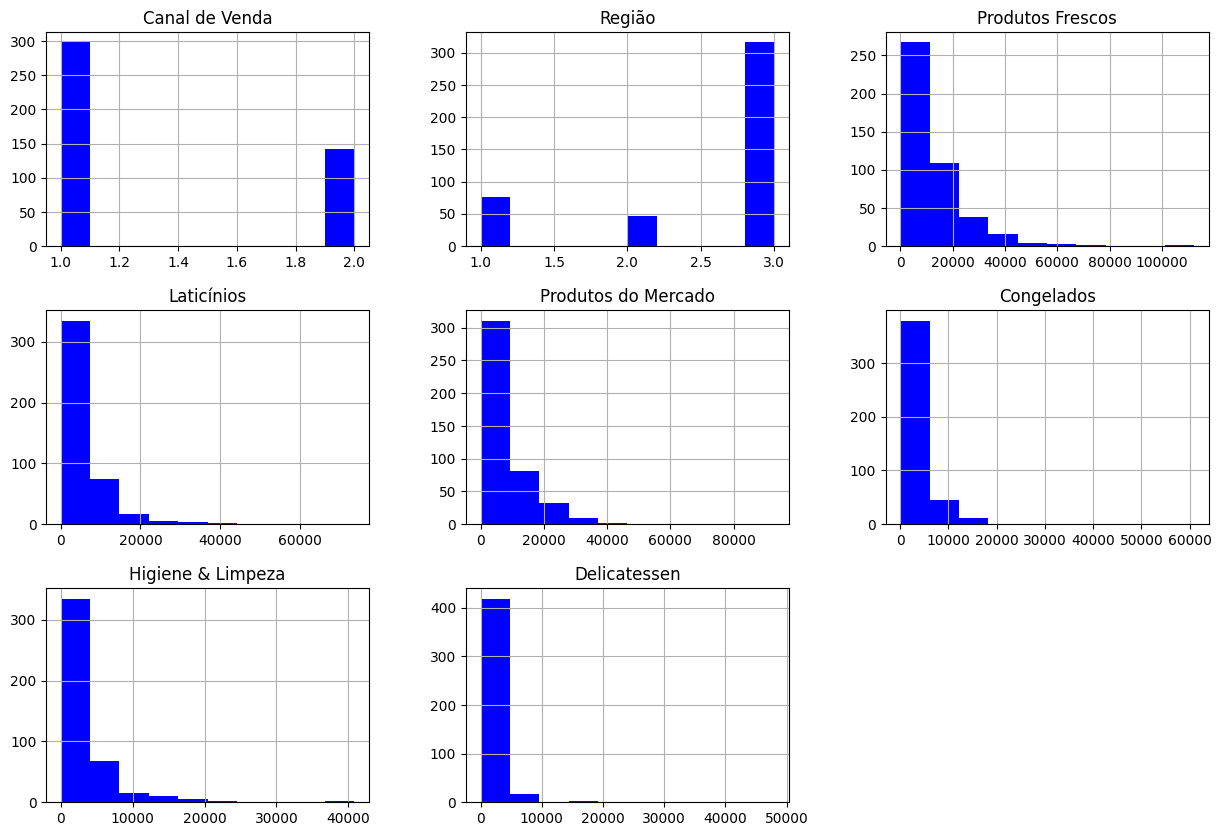

In [ ]:
# Histograma
# Decidimos começar a plotar o gráfico do histograma para todos os atributos do dataset. Como já obervado acima, no atributo Canal de Venda, há praticamente o dobro de vendas pelo canal de Pessoa
# jurídica do que pelo varejo. Nossa observação, também, segue para o atributo Região. Já observamos acima que a terceira região possui muito mais registros que as outras duas. Os gráficos de histograma
# vêm confirmar as observações feitas acima quando analisamos os dados estatísticos do dataset.

mercearia.hist(figsize = (15,10), color='blue')
plt.show()

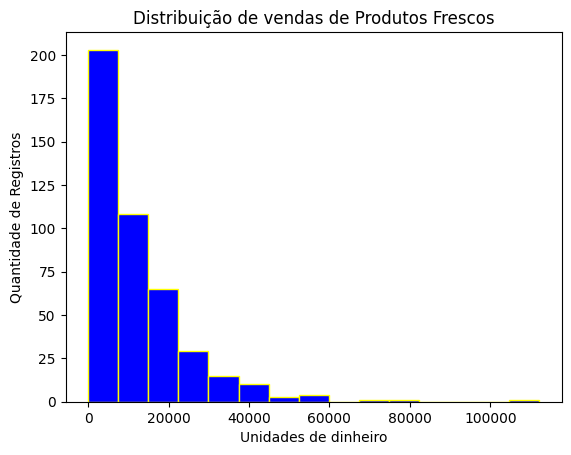

In [ ]:
# Histograma

# plotando o histograma
plt.hist(mercearia['Produtos Frescos'], bins=15, linewidth=1.0, edgecolor='yellow', color='blue')

# incluindo título do gráfico e legenda
plt.title('Distribuição de vendas de Produtos Frescos')
plt.ylabel('Quantidade de Registros')
plt.xlabel('Unidades de dinheiro');

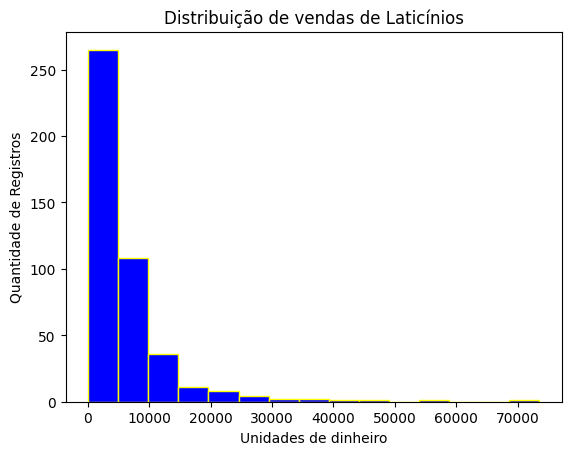

In [ ]:
# Histograma

# plotando o histograma
plt.hist(mercearia['Laticínios'], bins=15, linewidth=1.0, edgecolor='yellow', color='blue')

# incluindo título do gráfico e legenda
plt.title('Distribuição de vendas de Laticínios')
plt.ylabel('Quantidade de Registros')
plt.xlabel('Unidades de dinheiro');

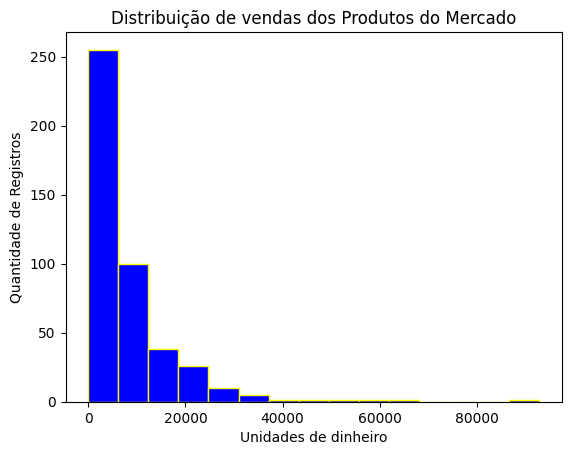

In [ ]:
# Histograma

# plotando o histograma
plt.hist(mercearia['Produtos do Mercado'], bins=15, linewidth=1.0, edgecolor='yellow', color='blue')

# incluindo título do gráfico e legenda
plt.title('Distribuição de vendas dos Produtos do Mercado')
plt.ylabel('Quantidade de Registros')
plt.xlabel('Unidades de dinheiro');

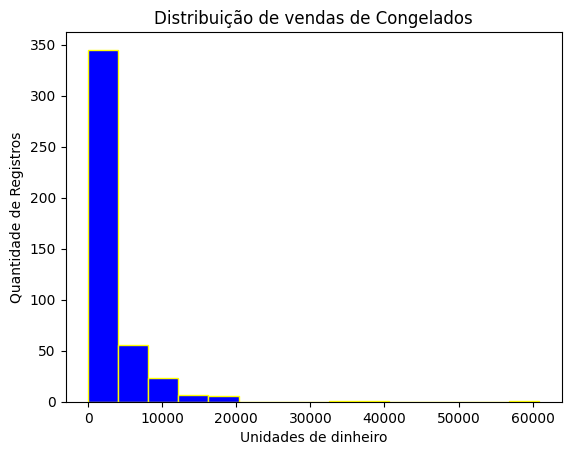

In [ ]:
# Histograma

# plotando o histograma
plt.hist(mercearia['Congelados'], bins=15, linewidth=1.0, edgecolor='yellow', color='blue')

# incluindo título do gráfico e legenda
plt.title('Distribuição de vendas de Congelados')
plt.ylabel('Quantidade de Registros')
plt.xlabel('Unidades de dinheiro');

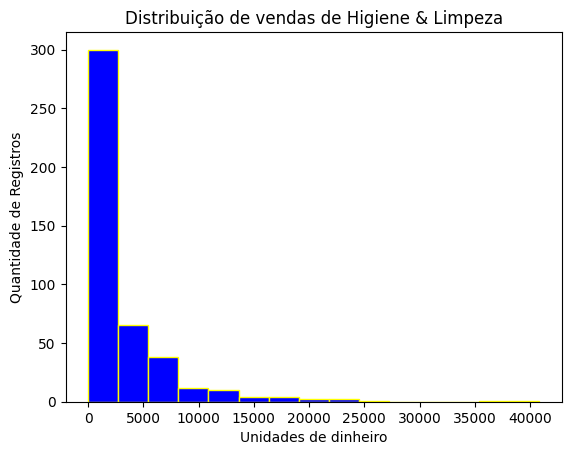

In [ ]:
# Histograma

# plotando o histograma
plt.hist(mercearia['Higiene & Limpeza'], bins=15, linewidth=1.0, edgecolor='yellow', color='blue')

# incluindo título do gráfico e legenda
plt.title('Distribuição de vendas de Higiene & Limpeza')
plt.ylabel('Quantidade de Registros')
plt.xlabel('Unidades de dinheiro');

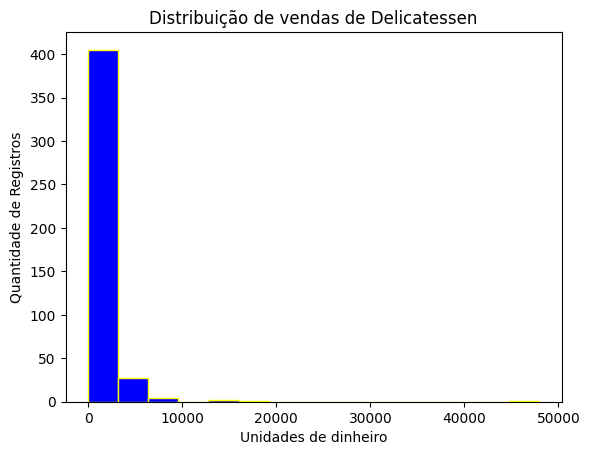

In [ ]:
# Histograma

# plotando o histograma
plt.hist(mercearia['Delicatessen'], bins=15, linewidth=1.0, edgecolor='yellow', color='blue')

# incluindo título do gráfico e legenda
plt.title('Distribuição de vendas de Delicatessen')
plt.ylabel('Quantidade de Registros')
plt.xlabel('Unidades de dinheiro');

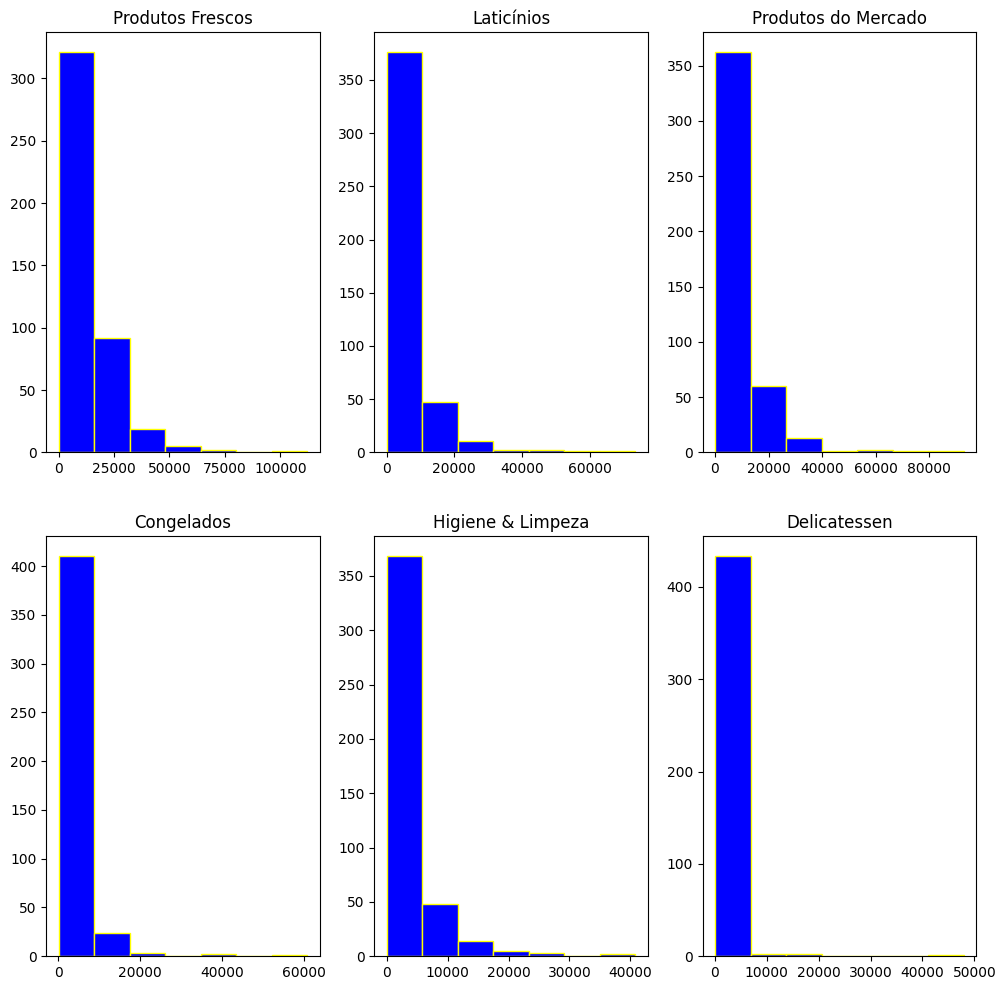

In [ ]:
# Reunimos todos os gráficos que foram impressos acima em um gupo de subplots para termos uma visão de todos em conjunto
# Decidimos manter os gráficos, também, separados para um detalhamento melhor. Há uma perda de percepção quando 
# os subplots são gerados devido ao tamanho utilizado.
# Optamos por configurar um grupo de subplots em um grid de 1 linha e 3 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,3, figsize = (12, 12))

# subplot1: histograma do Produtos Frescos
ax[0,0].hist(mercearia['Produtos Frescos'], bins=7, edgecolor='yellow', color='blue')
ax[0,0].set_title("Produtos Frescos")

# subplot2: histograma dos Laticínios
ax[0,1].hist(mercearia['Laticínios'], bins=7, edgecolor='yellow', color='blue')
ax[0,1].set_title("Laticínios")

# subplot3: histograma dos Produtos do Mercado
ax[0,2].hist(mercearia['Produtos do Mercado'], bins=7, edgecolor='yellow', color='blue')
ax[0,2].set_title("Produtos do Mercado")

# subplot4: histograma dos Congelados
ax[1,0].hist(mercearia['Congelados'], bins=7, edgecolor='yellow', color='blue')
ax[1,0].set_title("Congelados")

# subplot5: histograma dos produtos de Higiene & Limpeza
ax[1,1].hist(mercearia['Higiene & Limpeza'], bins=7, edgecolor='yellow', color='blue');
ax[1,1].set_title("Higiene & Limpeza");

# subplot6: histograma dos produtos de Delicatessen
ax[1,2].hist(mercearia['Delicatessen'], bins=7, edgecolor='yellow', color='blue');
ax[1,2].set_title("Delicatessen");

# Como já era de se esperar, os maiores volumes de vendas ocorrem nos produtos de menor preço. Em todos os atributos

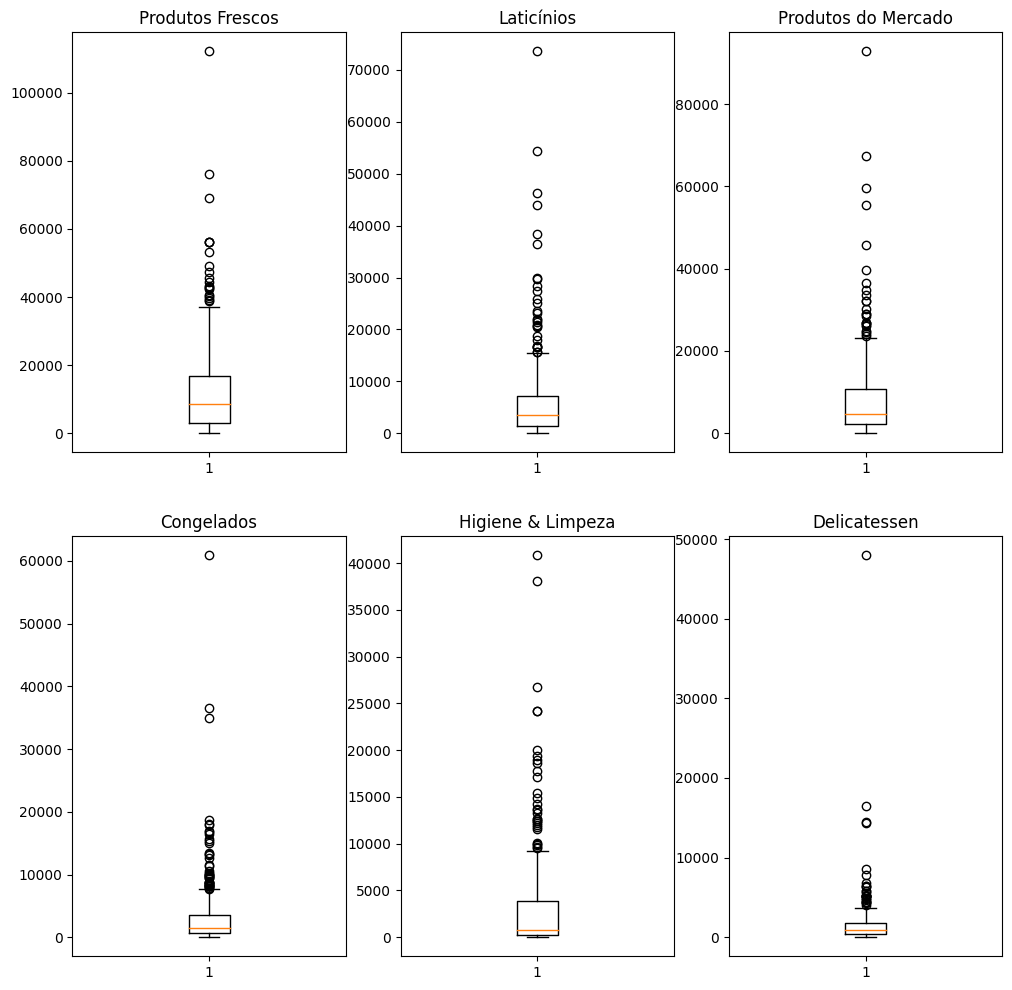

In [ ]:
#plotando com o boxplot
# Os gráficos do boxplot classificam as vendas de maior valor como outliers da massa de dados que está sendo utilizada.
# Isso se deve, como já observado anteriormente, pelo fato de que o maior volume de vendas se dá com os produtos mais baratos. Podemos observar, que
# em todos os atributos as caixas (box) se encontram nos limites dos menores valores de vendas. Embora haja vários círculos mostrados no gráfico, não entendemos como sendo outliers.
# Nossa interpretação é de que fazem parte da massa de dados que está sendo estudada. Só que como é de um valor mais alto, há poucas dela e o gráfico entende como sendo um outlier.
# Este comportamento do consumidor e demonstrado pelos gráficos, já era esperado.

fig, ax = plt.subplots(2,3, figsize = (12, 12))

# subplot1: histograma do Produtos Frescos
ax[0,0].boxplot(mercearia['Produtos Frescos'])
ax[0,0].set_title("Produtos Frescos")

# subplot2: histograma dos Laticínios
ax[0,1].boxplot(mercearia['Laticínios'])
ax[0,1].set_title("Laticínios")

# subplot3: histograma dos Produtos do Mercado
ax[0,2].boxplot(mercearia['Produtos do Mercado'])
ax[0,2].set_title("Produtos do Mercado")

# subplot4: histograma dos Congelados
ax[1,0].boxplot(mercearia['Congelados'])
ax[1,0].set_title("Congelados")

# subplot5: histograma dos produtos de Higiene & Limpeza
ax[1,1].boxplot(mercearia['Higiene & Limpeza']);
ax[1,1].set_title("Higiene & Limpeza");

# subplot6: histograma dos produtos de Delicatessen
ax[1,2].boxplot(mercearia['Delicatessen']);
ax[1,2].set_title("Delicatessen");

In [ ]:
# Correlação de Pearson
# Decidimos gerar um mapa de correlação para tentarmos visualizar como os atributos da base estão se relacionando.
# Verificamos, de imediato, que a correlação entre o Canal de Venda e a Região é muito pequeno (perto de zero -> que indicaria sem qualquer correlação). 
# O resultado é esperado pois seja qual for a Região que consta no dataset, teremos sempre os canais de venda disponíveis. Isto é o Canal de Venda independe da Região.
# Outro ponto de interesse é a correlação apresentada entre Canal de Venda e Produtos Frescos e Congelados. Os valores negativos demonstram uma correlação negativa
# o que significa que o Canal de Venda de Pessoa Jurídica vende mais que o canal do Varejo esses dois produtos (atributos). Contudo, vemos uma correlação positiva entre
# o Canal de Venda e os atributos: Laticínios, Produtos do Mercado, Higiene & Limpeza e Delicatessen. Isto indica que o canal Varejo vendeu mais destes atributos que o 
# canal Pessoa Jurídica.
# Os Produtos Frescos possuem uma correlação positiva com os produtos Congelados. Achamos interessante a correlação positiva. Em um primeiro momento, poderíamos pensar que
# são atributos díspares, pois quem compra produtos frescos não consome tanto os congelados. Entretanto, os dados mostram que há um crescimento de ambos, configurando uma
# correlação positiva.
# Um ponto que se destaca é o fato de que os atributos Laticínios e Delicatessem não apresentam correlação negativa com nenhum dos demais atributos. Aliás, vale observar
# que a correlação entre os dois atributos é bem significativa considerando os demais valores de correlação encontrados no dataset. Podemos entender que as compras dos produtos
# de laticínios vêm acompanhada das vendas dos produtos de Delicatessen. Este mesmo raciocínio pode ser levado quando comparamos o atributo Congelados e Delicatessen.
# Os dois maiores índices de correlação positiva estão associados a Laticínios com outros produtos: Produtos de Mercado e Higiene & Limpeza. A conclusão que chegamos é que 
# as compras feitas que envolveram Laticínios, na maioria das vezes envolveram, também, Produtos de Mercado e Higiene & Limpeza. Isso mostra uma correlação muito forte entre
# esses três produtos quando vistos sob a ótica dos clientes. Outro ponto curioso foi a correlação negativa entre o produto Higiene & Limpeza com Produtos Frescos e Congelados.
# Os dados mostram que talvez seja necessária uma estratégia de vendas visando levar o comprador de produtos de Higiene & Limpeza a comprar mais Produtos Frescos e Congelados.



mercearia.corr(method = 'pearson')

,Canal de Venda,Região,Produtos Frescos,Laticínios,Produtos do Mercado,Congelados,Higiene & Limpeza,Delicatessen
Canal de Venda,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Região,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Produtos Frescos,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Laticínios,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Produtos do Mercado,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Congelados,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Higiene & Limpeza,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


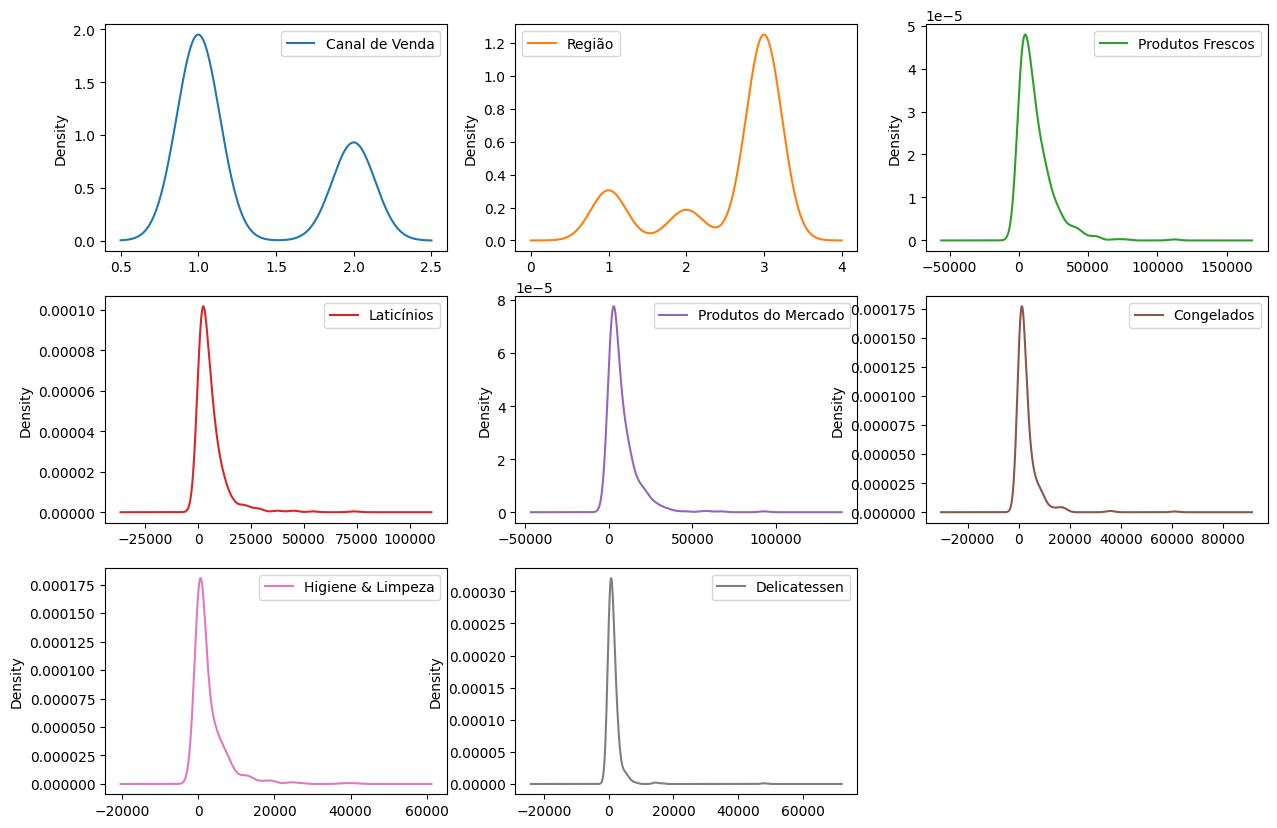

In [ ]:
# Density Plot
# Decidimos fazer um gráfico de densidade para cada atributo. O resultado não saiu do esperado. As curvas de densidade seguem o mesmo padrão (ditribuição normal).
# Este resultado já era esperado pela própria natureza do dataset.
# Os pontos de máximos globais das curvas estão nas redondezas do zero, o que, novamente, mostra que o maior volume de vendas é de produtos mais baratos.
# Os atributos Canal de Venda e Região apresentam curvas um pouco diferentes das dos demais atributos por se tratarem de valores discretos (temos dois canais de venda
# e três regiões).

mercearia.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

4- PRÉ-PROCESSAMENTO DE DADOS


Na fase anterior, já verificamos que não há elementos faltantes no dataset.
Já estamos fazendo a normalização e padronização visando a próxima fase.

Normalização
y = (x – min) / (max – min)

In [ ]:
# Normalização

# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(mercearia)
print(scaled)

[[1.00000000e+00 1.00000000e+00 1.12940044e-01 ... 3.10630465e-03
  6.54271997e-02 2.78473091e-02]
 [1.00000000e+00 1.00000000e+00 6.28990263e-02 ... 2.85484189e-02
  8.05898491e-02 3.69837297e-02]
 [1.00000000e+00 1.00000000e+00 5.66216072e-02 ... 3.91164289e-02
  8.60523222e-02 1.63558615e-01]
 ...
 [1.00000000e+00 1.00000000e+00 1.29543104e-01 ... 6.77141542e-03
  3.63462669e-01 3.88819358e-02]
 [0.00000000e+00 1.00000000e+00 9.17270036e-02 ... 1.66491355e-02
  4.04174015e-03 4.42636629e-02]
 [0.00000000e+00 1.00000000e+00 2.48243393e-02 ... 6.57418973e-04
  1.16108172e-02 1.02211097e-03]]


Padronização
média = soma (x) / contagem (x)

desvio_ padrão = sqrt (soma ((x - média) ^ 2) / contagem (x))

y = (x - média) / desvio padrão

In [ ]:
# Padronização

# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(mercearia)
print(scaled)

[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]
